# Pre-Processing

In [21]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [22]:
read_data = pd.read_csv('mushroom_data.csv')
#read_data = pd.read_csv('secondary_data.csv', ';')
read_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [23]:
# Check elements in data set
print(read_data.keys(),"\n")
print(read_data.shape,"\n")
print(read_data.describe(),"\n")

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object') 

(61069, 21) 

       cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000 



In [24]:
#Check missing values in each column
print(read_data.isna().sum(),"\n")
print(read_data.isnull().sum()/read_data.shape[0])

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64 

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0

### Drop Variables With 10% or More Missing Values

#### Will drop cap-surface (25,063 missing values, 41% missing)
#### Will drop gill-spacing (14,120 missing values, 23% missing)
#### Will drop stem-root (51,538 missing values, 84% missing)
#### Will drop stem-surface (38,124 missing values, 62% missing)
#### Will drop veil-type (57,892 missing values, 95% missing)
#### Will drop veil-color (53,656 missing values, 87% missing)
#### Will drop spore-print-color (51,538 missing values, 89% missing)

In [25]:
#Drop columns with too many missing values that is missing values >10,000
read_data_cleaned = read_data.drop(columns=['gill-spacing','stem-root','stem-surface','veil-type','veil-color','spore-print-color','cap-surface'])

### Drop records with missing values

In [26]:
#For remaining data drop rows with missing values
read_data_cleaned=read_data_cleaned.dropna()

#Export cleaned dataframe for visualization
read_data_cleaned.to_excel('mushroom_data_cleaned.xlsx')

In [27]:
# Check elements in data set
print(read_data_cleaned.keys())
print(read_data_cleaned.shape)

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')
(49067, 14)


In [28]:
# calculate counts of values for a column in a dataframe:
print(read_data_cleaned['class'].value_counts(),"\n")
print(read_data_cleaned['cap-shape'].value_counts(),"\n")
#print(read_data_cleaned['cap-surface'].value_counts(),"\n")
#print(read_data_cleaned['cap-color'].value_counts(),"\n")
print(read_data_cleaned['does-bruise-or-bleed'].value_counts(),"\n")
print(read_data_cleaned['gill-attachment'].value_counts(),"\n")
#print(read_data_cleaned['gill-spacing'].value_counts(),"\n")
print(read_data_cleaned['gill-color'].value_counts(),"\n")
#print(read_data_cleaned['stem-root'].value_counts(),"\n")
#print(read_data_cleaned['stem-surface'].value_counts(),"\n")
print(read_data_cleaned['stem-color'].value_counts(),"\n")
#print(read_data_cleaned['veil-type'].value_counts(),"\n")
#print(read_data_cleaned['veil-color'].value_counts(),"\n")
print(read_data_cleaned['has-ring'].value_counts(),"\n")
print(read_data_cleaned['ring-type'].value_counts(),"\n")
#print(read_data_cleaned['spore-print-color'].value_counts(),"\n")
print(read_data_cleaned['habitat'].value_counts(),"\n")
print(read_data_cleaned['season'].value_counts(),"\n")

p    26828
e    22239
Name: class, dtype: int64 

x    21839
f    11508
s     6996
b     3096
o     2405
p     1921
c     1302
Name: cap-shape, dtype: int64 

f    39536
t     9531
Name: does-bruise-or-bleed, dtype: int64 

a    12000
d     9886
x     7060
s     5648
p     5648
e     5295
f     3530
Name: gill-attachment, dtype: int64 

w    14890
y     8029
n     7275
p     5719
f     3530
g     2982
o     2738
r      977
k      881
u      732
e      713
b      601
Name: gill-color, dtype: int64 

w    17299
n    14565
y     5694
g     2626
o     2187
e     1697
u     1490
p     1025
k      837
f      706
r      542
l      226
b      173
Name: stem-color, dtype: int64 

f    39536
t     9531
Name: has-ring, dtype: int64 

f    41301
e     2082
z     1412
r     1399
p     1077
l     1074
g      722
Name: ring-type, dtype: int64 

d    34963
g     5678
l     3168
m     2429
h     2001
p      360
w      353
u      115
Name: habitat, dtype: int64 

a    24276
u    18789
w     4057
s     1

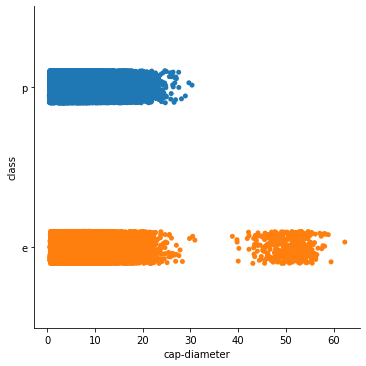

In [29]:
sns.catplot(x="cap-diameter", y="class", data=read_data_cleaned)

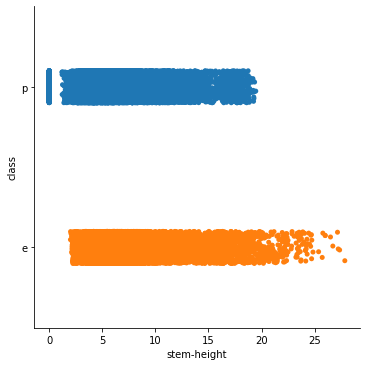

In [30]:
sns.catplot(x="stem-height", y="class", data=read_data_cleaned)

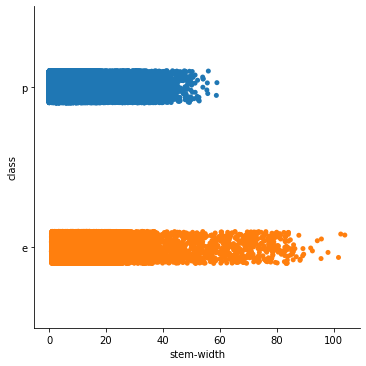

In [31]:
sns.catplot(x="stem-width", y="class", data=read_data_cleaned)

<AxesSubplot:>

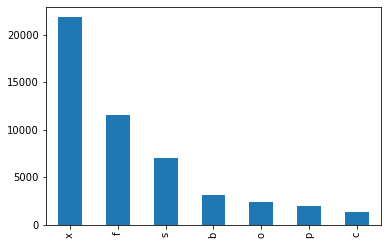

In [32]:
pd.value_counts(read_data_cleaned['cap-shape']).plot.bar()
#pd.value_counts(read_data_cleaned['cap-surface']).plot.bar()
#pd.value_counts(read_data_cleaned['cap-color']).plot.bar()
#pd.value_counts(read_data_cleaned['does-bruise-or-bleed']).plot.bar()
#pd.value_counts(read_data_cleaned['gill-attachment']).plot.bar()
#pd.value_counts(read_data_cleaned['gill-spacing']).plot.bar()
#pd.value_counts(read_data_cleaned['gill-color']).plot.bar()
#pd.value_counts(read_data_cleaned['stem-root']).plot.bar()
#pd.value_counts(read_data_cleaned['stem-surface']).plot.bar()
#pd.value_counts(read_data_cleaned['stem-color']).plot.bar()
#pd.value_counts(read_data_cleaned['veil-type']).plot.bar()
#pd.value_counts(read_data_cleaned['has-ring']).plot.bar()
#pd.value_counts(read_data_cleaned['ring-type']).plot.bar()
#pd.value_counts(read_data_cleaned['spore-print-color']).plot.bar()
#pd.value_counts(read_data_cleaned['habitat']).plot.bar()
#pd.value_counts(read_data_cleaned['season']).plot.bar(read_data_cleaned['class'])

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

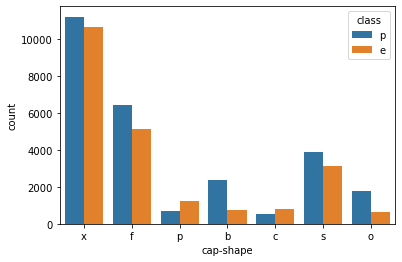

In [33]:
sns.countplot(x=read_data_cleaned['cap-shape'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['cap-surface'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['cap-color'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['does-bruise-or-bleed'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['gill-attachment'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['gill-spacing'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['gill-color'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['stem-root'], hue=read_data_cleaned['class'], data=read_data_cleaned) #shows differences in poisonous/edible
#sns.countplot(x=read_data_cleaned['stem-surface'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['stem-color'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['veil-type'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['has-ring'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['ring-type'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['spore-print-color'], hue=read_data_cleaned['class'], data=read_data_cleaned) #shows differences in poisonous/edible
#sns.countplot(x=read_data_cleaned['habitat'], hue=read_data_cleaned['class'], data=read_data_cleaned)
#sns.countplot(x=read_data_cleaned['season'], hue=read_data_cleaned['class'], data=read_data_cleaned)

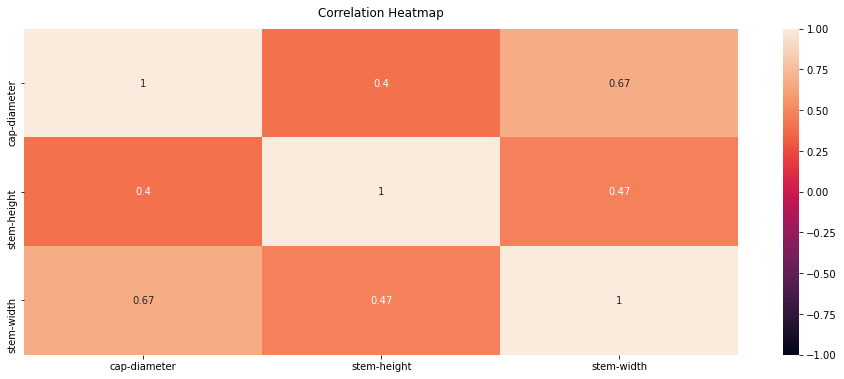

In [34]:
#Heatmap to check corelation between continous variables
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(read_data_cleaned.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [35]:
#convert output from e (edible) and p (poisonous) to 0 and 1 respectively. (for standarization) 
class_binary=[]
for i in read_data_cleaned['class']:
    if i=='p':
        class_binary.append(1)
    else:
        class_binary.append(0)
    
output = class_binary
variables = read_data_cleaned.drop(columns= 'class')

In [36]:
### code for scaling / normalizing data
from sklearn import preprocessing
import pandas as pd

input_data_continous = variables.drop(columns=['cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color',
       'stem-color', 'has-ring', 'ring-type','habitat', 'season'])

scaler = preprocessing.MinMaxScaler()
names = input_data_continous.columns
d = scaler.fit_transform(input_data_continous)
scaled_input_data_continous = pd.DataFrame(d, columns=names)
scaled_input_data_continous.head()

,cap-diameter,stem-height,stem-width
0,0.239418,0.608618,0.164469
1,0.261066,0.645961,0.175055
2,0.220194,0.639138,0.170725
3,0.221809,0.566248,0.153787
4,0.229402,0.593537,0.165528


## PCA

In [37]:
from sklearn.decomposition import PCA

#Apply PCA to continous data and convert 3 continous columns to 2 principal components
#input_data_continous = variables.drop(columns=['cap-shape','cap-color','does-bruise-or-bleed','gill-attachment','gill-color','stem-color','has-ring','ring-type','habitat','season'])
pca = PCA(n_components = 2, whiten = True, random_state=0)
X2D = pca.fit_transform(input_data_continous)

print("Before transfer, the dimension is:", input_data_continous.shape[1], "\n",
      "After transfer, the dimension is:", X2D.shape[1])

Before transfer, the dimension is: 3 
 After transfer, the dimension is: 2


In [38]:
#Concat principal components with categorical data
continous_input = pd.DataFrame(X2D)
continous_input.columns= ['PCA_variable_1','PCA_variable_2']
continous_input = continous_input.reset_index()
categorical_input = variables.drop(columns=['stem-width','stem-height','cap-diameter'])
categorical_input = categorical_input.reset_index()
transformed_input = pd.concat([continous_input, categorical_input], axis = 1)
print(transformed_input)
print(transformed_input.keys())

       index  PCA_variable_1  PCA_variable_2  index cap-shape cap-color  \
0          0        0.745299        1.761183      0         x         o   
1          1        0.890347        1.994138      1         x         o   
2          2        0.769182        1.422449      2         x         o   
3          3        0.605921        1.587356      3         f         e   
4          4        0.728933        1.592257      4         x         o   
...      ...             ...             ...    ...       ...       ...   
49062  49062       -0.748237       -0.793201  61064         s         y   
49063  49063       -0.818117       -0.705357  61065         f         y   
49064  49064       -0.734019       -0.787710  61066         s         y   
49065  49065       -0.813737       -0.706840  61067         f         y   
49066  49066       -0.818925       -0.730366  61068         s         y   

      does-bruise-or-bleed gill-attachment gill-color stem-color has-ring  \
0                     

In [39]:
transformed_input = transformed_input.drop(columns=['index', 'index'])
print(transformed_input)
print(transformed_input.keys())

       PCA_variable_1  PCA_variable_2 cap-shape cap-color  \
0            0.745299        1.761183         x         o   
1            0.890347        1.994138         x         o   
2            0.769182        1.422449         x         o   
3            0.605921        1.587356         f         e   
4            0.728933        1.592257         x         o   
...               ...             ...       ...       ...   
49062       -0.748237       -0.793201         s         y   
49063       -0.818117       -0.705357         f         y   
49064       -0.734019       -0.787710         s         y   
49065       -0.813737       -0.706840         f         y   
49066       -0.818925       -0.730366         s         y   

      does-bruise-or-bleed gill-attachment gill-color stem-color has-ring  \
0                        f               e          w          w        t   
1                        f               e          w          w        t   
2                        f          

In [40]:
#Convert categorical variables to dummy
to_dummy_all = pd.get_dummies(transformed_input, columns=['cap-shape','cap-color','does-bruise-or-bleed','gill-attachment','gill-color','stem-color','has-ring','ring-type','habitat','season'])
X_train, X_test, y_train, y_test = train_test_split(to_dummy_all, output, random_state=21, test_size=0.4)
X_train.head()

,PCA_variable_1,PCA_variable_2,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-color_b,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
29797,-1.013792,-0.210430,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6934,-0.247887,0.083989,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
46994,-0.619465,0.124173,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7289,0.123042,0.955800,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
27942,-0.258974,0.835133,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Naive Bayes

In [ ]:
# Training the Model
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()

g_nb.fit(X_train, y_train)

g_nb.score(X_test, y_test)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.coef_, logreg.intercept_)

## (b) Accuracy (test set)
print("Accuracy is:", logreg.score(X_test, y_test))

# Get it manually: do prediction

logreg_y_test_pred = logreg.predict(X_test)

np.sum(logreg_y_test_pred == y_test)/X_test.shape[0]

In [ ]:
# Suppose another classifier: it classifies all records to class zero. What would be the accuracy?

print(np.sum(y_test==0)/X_test.shape[0])  # proportion of zeros in test set

# another way:

1 - np.mean(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, logreg_y_test_pred)
my_matrix

In [ ]:
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1]) 
print("FN is:", my_matrix[1, 0])


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:', precision_score(y_test, logreg_y_test_pred))
print('Recall score:', recall_score(y_test, logreg_y_test_pred))
print('Accuracy score:', accuracy_score(y_test, logreg_y_test_pred))
print('F1 score:', f1_score(y_test, logreg_y_test_pred))

In [ ]:
# Plot the Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# Get probability
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# SCollect Necessary Measures
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
# Plot Figure
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
# Similar to Precision-Recall Curve

from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
# Get Measures
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)

# Generate Figure

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [ ]:
#False negatives in our confusion matrix represents poisonous mushrooms that were predicted as edible by our model.
#This could lead to potential fatalities and hence we have adjusted threshold of the sigmoid curve to minimize false negatives.

X_test_pred_df = pd.DataFrame(logreg.predict_proba(X_test)[:,1])
#threshold_list=[0.01,0.1,0.25,0.5,0.75]
threshold_list=[0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.6]
for i in threshold_list:
    print('\n###### for i ={} ######'.format(i)) 
    Y_test_pred = X_test_pred_df.applymap(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(y_test,Y_test_pred).ravel()
    print('True positive=',tp)
    print('False positive=',fp)
    print('True negative=',tn)
    print('False negative=',fn)
    print('Accuracy rate=' ,((tp+tn)/(tp+fp+tn+fn)))
    print('False negative rate=' ,((fn)/(fn+tp)))
    print('False positive rate=' ,((fp)/(fp+tn)))
    print('Precision=' ,((tp)/(tp+fp)))
    print('Recall=' ,((tp)/(tp+fn)))
    print('F1=' ,(2*((((tp)/(tp+fp))*((tp)/(tp+fn)))/(((tp)/(tp+fp))+((tp)/(tp+fn))))))
    
    

## Ensemble Methods

## Voting Classifier

In [ ]:
# Define Functions/Estimators

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(kernel = 'rbf', random_state=42) 
nbg_clf = GaussianNB()

In [ ]:
# Apply Voting Classifier

from sklearn.ensemble import VotingClassifier

# Define voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr1', log_clf), ('svc', svm_clf), ('nbg', nbg_clf)],
    voting='hard')

# Train the model
voting_clf.fit(X_train, y_train)

# Performance Measure
print("Test score for voting classifier is:", voting_clf.score(X_test, y_test))

In [ ]:
#Confusion matrix for voting classifier
voting_y_test_pred = voting_clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,voting_y_test_pred).ravel()
print('True positive=',tp)
print('False positive=',fp)
print('True negative=',tn)
print('False negative=',fn)
print('Accuracy rate=' ,((tp+tn)/(tp+fp+tn+fn)))
print('False negative rate=' ,((fn)/(fn+tp)))
print('False positive rate=' ,((fp)/(fp+tn)))
print('Precision=' ,((tp)/(tp+fp)))
print('Recall=' ,((tp)/(tp+fn)))
print('F1=' ,(2*((((tp)/(tp+fp))*((tp)/(tp+fn)))/(((tp)/(tp+fp))+((tp)/(tp+fn))))))

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)

bag_clf = BaggingClassifier(dt, # estimator
                            n_estimators=200, # K, we have 200 predicted values
                            max_samples=100, # B
                            bootstrap=True, random_state=42)


bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(bag_clf.score(X_test, y_test))

In [ ]:
#Confusion matrix for bagging
bag_y_test_pred = bag_clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,bag_y_test_pred).ravel()
print('True positive=',tp)
print('False positive=',fp)
print('True negative=',tn)
print('False negative=',fn)
print('Accuracy rate=' ,((tp+tn)/(tp+fp+tn+fn)))
print('False negative rate=' ,((fn)/(fn+tp)))
print('False positive rate=' ,((fp)/(fp+tn)))
print('Precision=' ,((tp)/(tp+fp)))
print('Recall=' ,((tp)/(tp+fn)))
print('F1=' ,(2*((((tp)/(tp+fp))*((tp)/(tp+fn)))/(((tp)/(tp+fp))+((tp)/(tp+fn))))))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=42)
# forest with 200 trees, each tree is trained with sample sie (maximum) 100

rnd_clf.fit(X_train, y_train)

print(rnd_clf.score(X_test, y_test))

In [ ]:
#Confusion matrix for random forest
rnd_y_test_pred = rnd_clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,rnd_y_test_pred).ravel()
print('True positive=',tp)
print('False positive=',fp)
print('True negative=',tn)
print('False negative=',fn)
print('Accuracy rate=' ,((tp+tn)/(tp+fp+tn+fn)))
print('False negative rate=' ,((fn)/(fn+tp)))
print('False positive rate=' ,((fp)/(fp+tn)))
print('Precision=' ,((tp)/(tp+fp)))
print('Recall=' ,((tp)/(tp+fn)))
print('F1=' ,(2*((((tp)/(tp+fp))*((tp)/(tp+fn)))/(((tp)/(tp+fp))+((tp)/(tp+fn))))))

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define base model
naive_dt = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=200, learning_rate=0.5,
    random_state=42)

ada_clf.fit(X_train, y_train)

# Performance
print(ada_clf.score(X_test, y_test))

In [ ]:
#Confusion matrix for random forest
ada_y_test_pred = ada_clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,ada_y_test_pred).ravel()
print('True positive=',tp)
print('False positive=',fp)
print('True negative=',tn)
print('False negative=',fn)
print('Accuracy rate=' ,((tp+tn)/(tp+fp+tn+fn)))
print('False negative rate=' ,((fn)/(fn+tp)))
print('False positive rate=' ,((fp)/(fp+tn)))
print('Precision=' ,((tp)/(tp+fp)))
print('Recall=' ,((tp)/(tp+fn)))
print('F1=' ,(2*((((tp)/(tp+fp))*((tp)/(tp+fn)))/(((tp)/(tp+fp))+((tp)/(tp+fn))))))

# KNN

In [ ]:
# Train a k-NN model with k = 3
from sklearn.neighbors import KNeighborsClassifier

knn_3 = KNeighborsClassifier(n_neighbors = 3)

knn_3.fit(X_train, y_train)
knn_3.predict(X_test)
knn_3.score(X_test, y_test), knn_3.score(X_train, y_train)

In [ ]:
#Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier()

# range(3, 26, 2) # increase by 2

param_knn = {'n_neighbors': range(3, 26, 2)}  # exactly the same as the input variable name. 

#apply grid search
knn_grid = GridSearchCV(knn, param_knn, cv = 5, n_jobs=3)

knn_grid.fit(X_train, y_train)

# the best hyperparameter chosen:
print(knn_grid.best_params_)

print(knn_grid.best_score_)
knn_grid.best_estimator_ # get the knn back

In [ ]:
#Performace metrics
y_test_pred = knn_grid.predict(X_test)
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix

print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1]) 
print("FN is:", my_matrix[1, 0])

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

In [ ]:
#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# S1. Get probability
y_pred_proba = knn_grid.predict_proba(X_test)[:, 1]

# S2. Collect Necessary Measures
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
from sklearn.metrics import roc_auc_score

# we have obtained the predicted probability in the previous step: y_pred_proba

auc = roc_auc_score(y_test, y_test_pred)

print("AUC for KNN:",  auc )

In [ ]:
from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
# Get Measures
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)

# Generate Figure

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

# Linear SVM #

In [ ]:
## Linear SVM
from sklearn.svm import LinearSVC
lr_svc = LinearSVC()
lr_svc.fit(X_train, y_train)
lr_svc.score(X_test, y_test)

In [ ]:
# Linear SVC with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define Function
linear_svc = LinearSVC(random_state = 22) # must specify random state here

# Define a list of hyperparameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]   }

grid_lr_svc = GridSearchCV(linear_svc, params_svc, cv = 5, n_jobs=3)

grid_lr_svc.fit(X_train, y_train)

In [ ]:
print(grid_lr_svc.best_params_)
print(grid_lr_svc.best_score_)

In [ ]:
## Confusion Matrix for Linear SVM with CV
from sklearn.metrics import confusion_matrix

y_test_pred = grid_lr_svc.predict(X_test)
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

In [ ]:
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1]) 
print("FN is:", my_matrix[1, 0])
print("FN Rate is:", my_matrix[1, 0]/(my_matrix[1, 0] + my_matrix[1, 1]))

In [ ]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
from sklearn import metrics
# AOC/ROC curve
metrics.plot_roc_curve(grid_lr_svc, X_test, y_test)

In [ ]:
# Print scatter plot to view classification of the simplified dataset
import seaborn as sns

df1 = ['Edible' if i==0 else 'Poisonous' for i in output]
df = pd.DataFrame(df1, columns=['Class'])
full_data = pd.concat([continous_input, df], axis = 1)

sns.scatterplot(data=full_data, x='PCA_variable_1', y='PCA_variable_2', hue="Class")

# SVM with Kernel RBF #

In [ ]:
from sklearn.svm import SVC

k_svm = SVC(kernel = 'rbf', random_state = 22)

k_svm.fit(X_train, y_train)

k_svm.score(X_test, y_test)

In [ ]:
# SVM (RBF with CV=5)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define Function
svm = SVC(kernel = 'rbf', random_state = 22)

#define a list of parameters
param_svc_kernel = {'C':  [0.001, 0.01, 0.1, 1, 10, 100, 10000]     ,
                    'gamma':   [0.0001, 0.001,0.1,1,10]    } # C = 10,000 mimics hard-margin SVM

#apply grid search
grid_svm = GridSearchCV(svm, param_svc_kernel, cv = 5, n_jobs=3)

grid_svm.fit(X_train, y_train)

In [ ]:
print(grid_svm.best_params_)
print(grid_svm.best_score_)

In [ ]:
grid_svm.score(X_test, y_test)

In [ ]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix

y_test_pred = grid_svm.predict(X_test)
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

In [ ]:
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1]) 
print("FN is:", my_matrix[1, 0])
print("FN Rate is:", my_matrix[1, 0]/(my_matrix[1, 0] + my_matrix[1, 1]))

In [ ]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
from sklearn import metrics
# AOC/ROC curve
metrics.plot_roc_curve(grid_svm, X_test, y_test)

In [ ]:
#K-MEANS#

In [17]:
#Using the Silhouette method, it can be seen that the Silhouette value is maximum for K=6. 
#Hence it can be concluded that the dataset can be segmented properly with 6 clusters.
import sklearn.cluster as cluster
import sklearn.metrics as metrics
print("Silhouette score for clusters:")
for i in range(3,9):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(scaled_input_data_continous).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(scaled_input_data_continous,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for clusters:
Silhouette score for k(clusters) = 3 is 0.46406668128939044
Silhouette score for k(clusters) = 4 is 0.4342447176220962
Silhouette score for k(clusters) = 5 is 0.43646747454288604
Silhouette score for k(clusters) = 6 is 0.3282891807179744
Silhouette score for k(clusters) = 7 is 0.32175164798491196
Silhouette score for k(clusters) = 8 is 0.28954649659479303


In [18]:
from sklearn.cluster import KMeans
wss=[]
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_input_data_continous)
    wss.append(kmeans.inertia_)
kmeans
print(wss)

[1472.3082968789568, 862.8174184589608, 685.6164639301956, 547.1739605504325, 458.3165264107207, 370.11927605171536, 321.05732598986197, 279.16155239010703, 250.42506448138445]


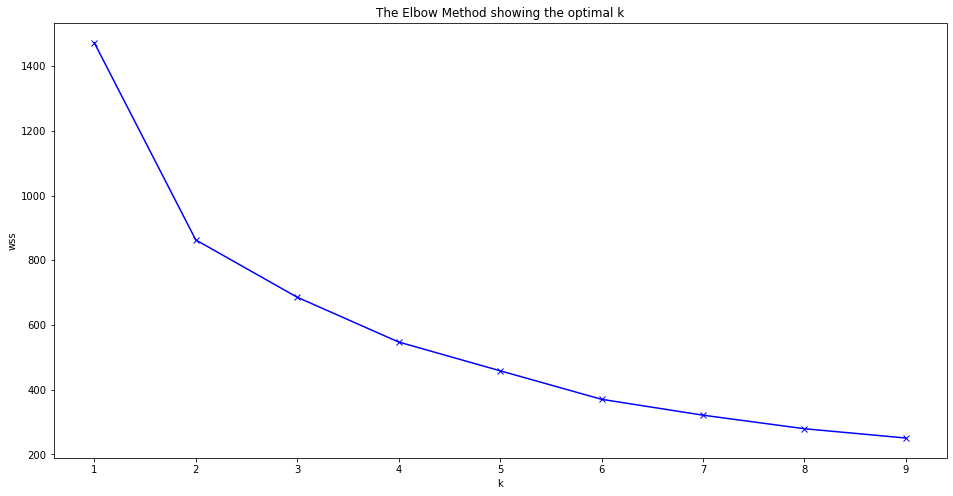

In [19]:
plt.figure(figsize=(16,8))
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('wss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(scaled_input_data_continous)

KMeans(n_clusters=3)

In [21]:
cls_predict=kmeanModel.predict(scaled_input_data_continous)
print("Number of Clusters : 3")
print("predicted Labels",cls_predict)
print("Number of unique clusters",np.unique(cls_predict))
print("The number of elememts in a list",len(np.unique(cls_predict)))
print("performance score",kmeanModel.score(scaled_input_data_continous))


Number of Clusters : 3
predicted Labels [2 2 2 ... 1 1 1]
Number of unique clusters [0 1 2]
The number of elememts in a list 3
performance score -685.6157707245189


In [21]:
from sklearn.tree import DecisionTreeClassifier

#train and test decision tree classifier
ds = DecisionTreeClassifier(random_state = 21, criterion = 'entropy')
ds.fit(X_train, y_train)
ds.score(X_train, y_train)
X_test_pred=ds.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(ds.score(X_test,y_test))
tn, fp, fn, tp = confusion_matrix(X_test_pred,y_test).ravel()
print('True positive=',tp)
print('False positive=',fp)
print('True negative=',tn)
print('False negative=',fn)

print('F1 score:',f1_score(y_test,X_test_pred))

0.9914913129872115
True positive= 10610
False positive= 76
True negative= 8850
False negative= 91
F1 score: 0.992191518211998


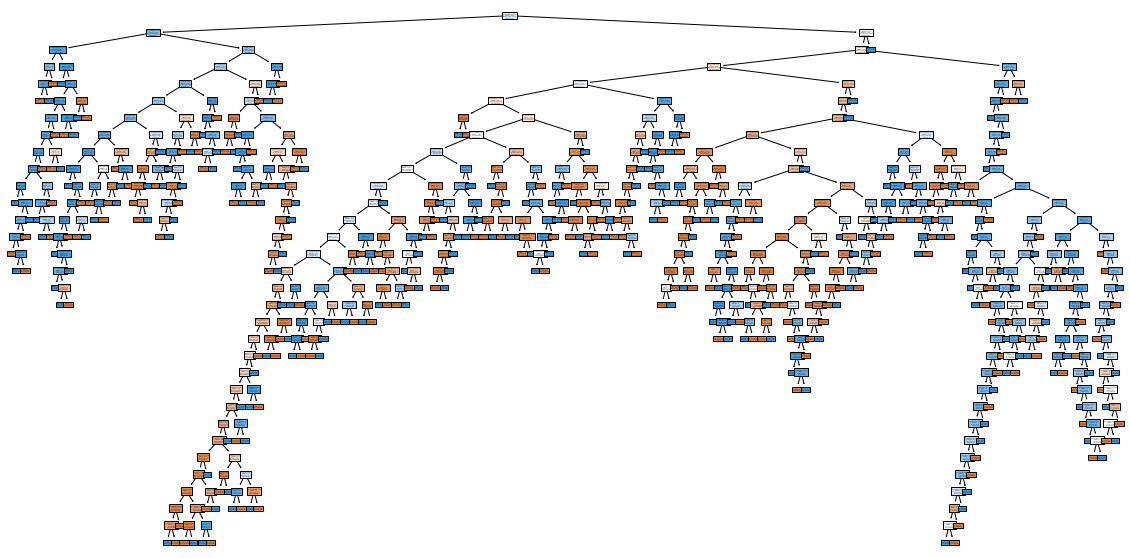

In [23]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(ds, feature_names = to_dummy_all.columns, # specify variable names 
               class_names = ['poisonous','edible'], # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()


In [39]:
#The above decision true is very accurate but has so many leaves that it has lost its interpretability.
#We have tuned the tree to restrict maximum number of leaves and gain back interpretability while giving up accuracy.

from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0)

dt_params = {'min_samples_split':  range(1,4), 'max_leaf_nodes':    range(22,30)}

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

print('Optimum parameters:',grid_tree.best_params_)
print('Acccuracy of the new tree:',grid_tree.score(X_test,y_test))

Optimum parameters: {'max_leaf_nodes': 29, 'min_samples_split': 2}
Acccuracy of the new tree: 0.8195852651959036


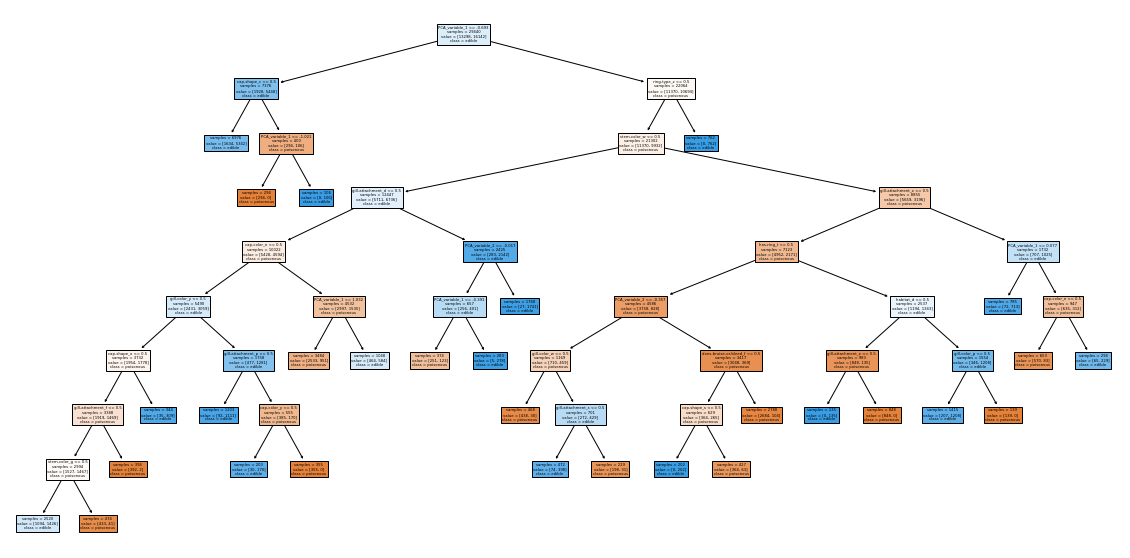

In [40]:
# Plot the new decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = to_dummy_all.columns, # specify variable names 
               class_names = ['poisonous','edible'], # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()


In [41]:
print('Accuracy of decision tree:',grid_tree.score(X_test,y_test))
X_test_pred_grid = grid_tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,X_test_pred_grid).ravel()
print('True positive=',tp)
print('False positive=',fp)
print('True negative=',tn)
print('False negative=',fn)

print('F1 score:',f1_score(y_test,X_test_pred_grid))

Accuracy of decision tree: 0.8195852651959036
True positive= 9738
False positive= 2593
True negative= 6348
False negative= 948
F1 score: 0.8461571881652692


In [42]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Accuracy of logistic model on test data
print("Accuracy is:", logreg.score(X_test, y_test))



Accuracy is: 0.745096041167779


In [43]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Accuracy of logistic model on test data
print("Accuracy is:", logreg.score(X_test, y_test))



Accuracy is: 0.745096041167779


In [44]:
importance = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
print(importance)

         Attribute  Importance
0   PCA_variable_1    0.093735
1   PCA_variable_2   -0.102045
2      cap-shape_b    1.033621
3      cap-shape_c   -0.298603
4      cap-shape_f   -0.185255
..             ...         ...
71       habitat_w   -2.333798
72        season_a    0.487747
73        season_s   -0.739230
74        season_u    0.578561
75        season_w   -0.522986

[76 rows x 2 columns]


[1.0336211250371437, -0.7505583319839222, 0.9485035460343882, 0.9025670889254762, 0.9207572916081915, -1.8740990651926825, 1.130881058195298, -3.217483792618806, 4.18379780481194, -1.509647691021723, 1.4969091689106448, -1.819720354634854, 1.245357962105594, -1.3181604651990362, -2.987930682437574, 2.792022996064117, 3.319970546541941, -1.1514390095743474, -2.4121957504853393, -0.8863828396153913, -2.3088088695509383, 3.3622805413529417, 0.837835373064363, 3.6298642526386016, -2.637647937435274, -2.3337980422873192]
['cap-shape_b', 'cap-shape_s', 'cap-color_e', 'cap-color_r', 'gill-attachment_d', 'gill-attachment_p', 'gill-color_e', 'stem-color_b', 'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l', 'stem-color_p', 'stem-color_w', 'has-ring_f', 'has-ring_t', 'ring-type_f', 'ring-type_g', 'ring-type_l', 'ring-type_p', 'ring-type_r', 'ring-type_z', 'habitat_g', 'habitat_p', 'habitat_u', 'habitat_w']


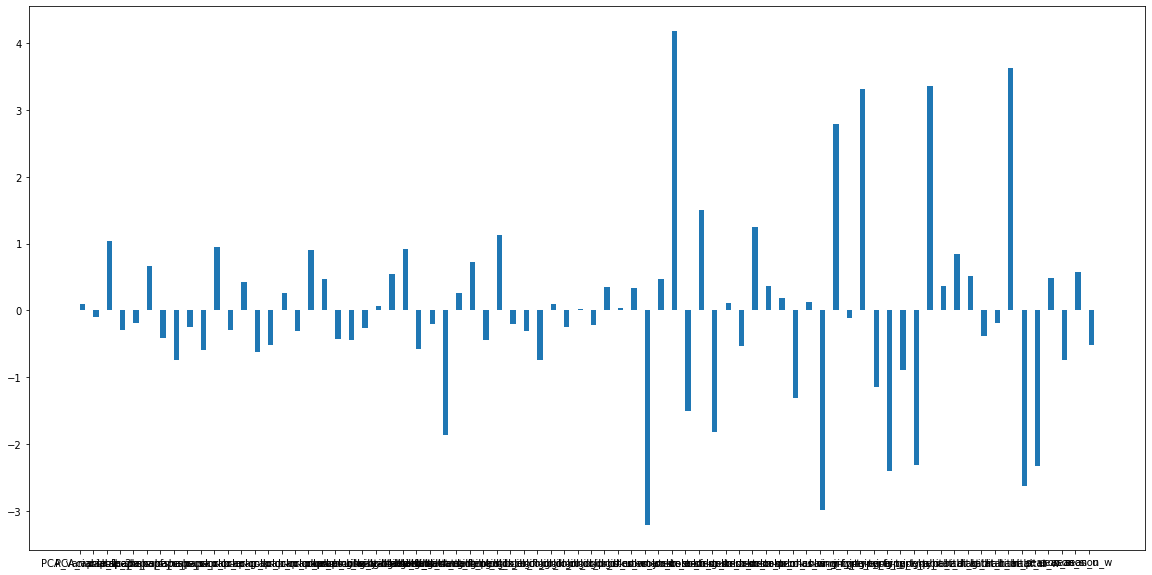

In [55]:
best = []
feature = []
names=importance['Attribute']
score=importance['Importance']
i=0
while i < len(score):
    if score[i]>0.75:
        best.append(score[i])
        feature.append(names[i])
    elif score[i] < -0.75:
        best.append(score[i])
        feature.append(names[i])
    i=i+1
    
print(best)
print(feature)
plt.figure(figsize=(20, 10))
plt.bar([x for x in names], score, align='edge', width = 0.4)
#plt.set_xticklabels(feature)
plt.show()


In [56]:
to_remove=[]
for i in to_dummy_all:
    if i not in feature:
        to_remove.append(i)
to_dummy_all_imp = to_dummy_all.drop(columns=to_remove)

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(to_dummy_all_imp, class_binary, random_state=21, test_size=0.3)

X_train_dropped.shape


(34346, 26)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)


X_train_poly = poly.fit_transform(X_train_dropped)
X_test_poly = poly.fit_transform(X_test_dropped)

logreg_poly = LogisticRegression()
logreg_poly.fit(X_train_poly, y_train_dropped)
print(logreg_poly.coef_, logreg_poly.intercept_)
print("Accuracy is:", logreg_poly.score(X_test_poly, y_test_dropped))

[[ 0.60622472  0.65803714  0.09370332 ...  0.          0.
  -0.27057214]] [0.68235481]
Accuracy is: 0.7566741389851233


In [58]:
#Confusion matrix for polynomial logistic regression model
X_test_poly_pred = logreg_poly.predict(X_test_poly)
tn, fp, fn, tp = confusion_matrix(y_test_dropped,X_test_poly_pred).ravel()
print('True positive=',tp)
print('False positive=',fp)
print('True negative=',tn)
print('False negative=',fn)

print('F1 Score:',f1_score(y_test_dropped,X_test_poly_pred))

True positive= 6623
False positive= 2222
True negative= 4516
False negative= 1360
F1 Score: 0.7871404801521273


In [59]:
#False negatives in our confusion matrix represents poisonous mushrooms that were predicted as edible by our model.
#This could lead to potential fatalities and hence we have adjusted threshold of the sigmoid curve to minimize false negatives.

X_test_poly_pred_df = pd.DataFrame(logreg_poly.predict_proba(X_test_poly)[:,1])
threshold_list=[0.25,0.3,0.35,0.4,0.45]
for i in threshold_list:
    print('\n###### for i ={} ######'.format(i))
    Y_test_pred = X_test_poly_pred_df.applymap(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(y_test_dropped,Y_test_pred).ravel()
    print('True positive=',tp)
    print('False positive=',fp)
    print('True negative=',tn)
    print('False negative=',fn)



###### for i =0.25 ######
True positive= 7865
False positive= 4850
True negative= 1888
False negative= 118

###### for i =0.3 ######
True positive= 7194
False positive= 3339
True negative= 3399
False negative= 789

###### for i =0.35 ######
True positive= 6729
False positive= 2357
True negative= 4381
False negative= 1254

###### for i =0.4 ######
True positive= 6729
False positive= 2357
True negative= 4381
False negative= 1254

###### for i =0.45 ######
True positive= 6705
False positive= 2313
True negative= 4425
False negative= 1278


# K-Prototype

In [41]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [43]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Get the position of categorical columns
catColumnsPos = [transformed_input.columns.get_loc(col) for col in list(transformed_input.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(transformed_input.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
Categorical columns position  : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [45]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(transformed_input, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [46]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
df_cost

,Cluster,Cost
0,1,211308.346699
1,2,181095.099824
2,3,153363.732118
3,4,137729.355052
4,5,128856.292859
5,6,122374.828817
6,7,119200.062693
7,8,114357.367639
8,9,110329.332183


In [47]:
from plotnine import *
import plotnine

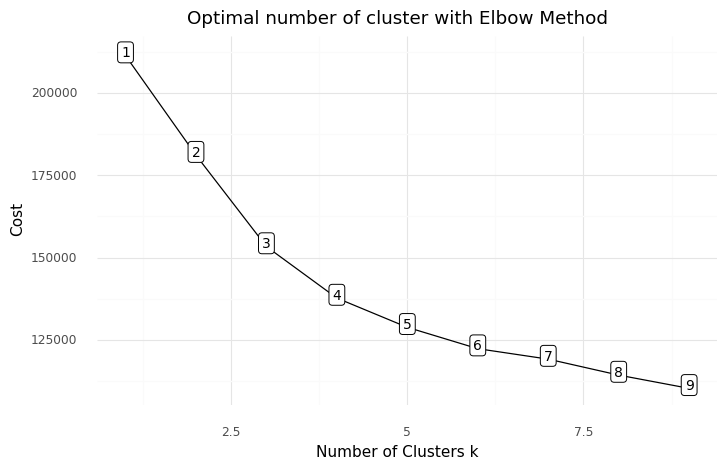

<ggplot: (98983913102)>

In [48]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [49]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [50]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kprototype.fit_predict(transformed_input, categorical = catColumnsPos)

array([1, 1, 1, ..., 3, 3, 3], dtype=uint16)

In [51]:
# Cluster centorid
print(transformed_input.keys())
print("Cluster Centroid:",kprototype.cluster_centroids_)
print("Iterations:",kprototype.n_iter_)
print("Cost:",kprototype.cost_)

Index(['PCA_variable_1', 'PCA_variable_2', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color',
       'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')
Cluster Centroid: [['3.1257094026860934' '-2.9998863948230765' 'o' 'n' 'f' 'f' 'f' 'n' 'f'
  'f' 'd' 'u']
 ['0.627712034205082' '0.10095931319679016' 'x' 'n' 'f' 'd' 'w' 'w' 'f'
  'f' 'd' 'a']
 ['3.218796628417646' '8.271961792987213' 'o' 'y' 'f' 'p' 'y' 'k' 'f' 'f'
  'd' 'u']
 ['-0.6232759617066544' '-0.054177316092964285' 'x' 'n' 'f' 'a' 'w' 'n'
  'f' 'f' 'd' 'a']]
Iterations: 27
Cost: 137729.3550520859
